# baseline_dropout.ipynb
---

#### Jack McShane
#### Rahul Shamdasani

### Imports

In [95]:
import torch
import torchvision as tv
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools
import sklearn.metrics as metrics

In [96]:
# imports for the network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable as Var

In [97]:
from google.colab import drive
drive.mount('/content/drive')
!cp drive/MyDrive/pytorchtools.py .
!cp drive/MyDrive/plot_confusion_matrix.py .
from pytorchtools import EarlyStopping
from plot_confusion_matrix import plot_confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
"""
This source served as a great resource and a starting point for the code in this notebook

https://nextjournal.com/gkoehler/pytorch-mnist
"""

'\nThis source served as a great resource and a starting point for the code in this notebook\n\nhttps://nextjournal.com/gkoehler/pytorch-mnist\n'

In [99]:
"""
inspiration for the code used below comes from these sources:

https://pytorch.org/docs/stable/notes/randomness.html
"""

# setting random seed for repeatable results
rand_seed = 5
torch.manual_seed(rand_seed)
random.seed(rand_seed)
np.random.seed(rand_seed)

## Definitions

### Defining Network Structure(s)

In [100]:
# defining hyperparameters for the network
class hyp:
  n_epochs = 50
  batch_size = 100
  momentum = .9
  pat = 10
  lr = .05
  drop25 = .25
  drop50 = .5
  drop75 = .75
  nfc1_inputs = 12*5*5 # using 4x4 filters and stride of two, the dimensionailty of the feature maps is 5x5 after two convolutional layers (there are 12 of them)
  nnodes_fc1 = 30
  nnodes_fc2 = 10

In [101]:
"""
inspiration for the code used below comes from these sources:

https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
https://stackoverflow.com/questions/61116355/interpretation-of-in-channels-and-out-channels-in-conv2d-in-pytorch-convolution
https://pytorch.org/docs/stable/generated/torch.nn.Module.html
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/
https://stackoverflow.com/questions/63779798/adding-xavier-initiliazation-in-pytorch
https://pytorch.org/docs/master/nn.init.html?highlight=init
"""

# this architecture uses dropout rate of 25%
# building the network
class CNN25(nn.Module):
  # overwrite init func
  def __init__(self):
    super(CNN25, self).__init__()

    # defining network architecture
    self.net = nn.Sequential(
        # first layer -- convolutional
        nn.Conv2d(in_channels=1, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop25),

        # second layer -- convolutional
        nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop25),
        nn.Flatten(), # flattens the layer's output for use in the first linear layer

        # third layer -- fully connected
        nn.Linear(hyp.nfc1_inputs, hyp.nnodes_fc1),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop25),

        # fourth layer -- fully connected
        nn.Linear(hyp.nnodes_fc1, hyp.nnodes_fc2)
    )


    # initializing network weights using Glorot initialization
    torch.nn.init.xavier_uniform_(self.net[0].weight)
    torch.nn.init.xavier_uniform_(self.net[3].weight)
    torch.nn.init.xavier_uniform_(self.net[7].weight)
    torch.nn.init.xavier_uniform_(self.net[10].weight)




  # defining the forward pass for the network
  def forward(self, data):
    return self.net(data)


In [102]:
# dropout rate = 50%
# building the network
class CNN50(nn.Module):
  # overwrite init func
  def __init__(self):
    super(CNN50, self).__init__()

    # defining network architecture
    self.net = nn.Sequential(
        # first layer -- convolutional
        nn.Conv2d(in_channels=1, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop50),

        # second layer -- convolutional
        nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop50),
        nn.Flatten(), # flattens the layer's output for use in the first linear layer

        # third layer -- fully connected
        nn.Linear(hyp.nfc1_inputs, hyp.nnodes_fc1),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop50),

        # fourth layer -- fully connected
        nn.Linear(hyp.nnodes_fc1, hyp.nnodes_fc2)
    )


    # initializing network weights using Glorot initialization
    torch.nn.init.xavier_uniform_(self.net[0].weight)
    torch.nn.init.xavier_uniform_(self.net[3].weight)
    torch.nn.init.xavier_uniform_(self.net[7].weight)
    torch.nn.init.xavier_uniform_(self.net[10].weight)




  # defining the forward pass for the network
  def forward(self, data):
    return self.net(data)

In [103]:
# dropout rate = 75%
# building the network
class CNN75(nn.Module):
  # overwrite init func
  def __init__(self):
    super(CNN75, self).__init__()

    # defining network architecture
    self.net = nn.Sequential(
        # first layer -- convolutional
        nn.Conv2d(in_channels=1, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop75),

        # second layer -- convolutional
        nn.Conv2d(in_channels=12, out_channels=12, kernel_size=(4,4), stride=2),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop75),
        nn.Flatten(), # flattens the layer's output for use in the first linear layer

        # third layer -- fully connected
        nn.Linear(hyp.nfc1_inputs, hyp.nnodes_fc1),
        nn.ReLU(),
        nn.Dropout(p=hyp.drop75),

        # fourth layer -- fully connected
        nn.Linear(hyp.nnodes_fc1, hyp.nnodes_fc2)
    )


    # initializing network weights using Glorot initialization
    torch.nn.init.xavier_uniform_(self.net[0].weight)
    torch.nn.init.xavier_uniform_(self.net[3].weight)
    torch.nn.init.xavier_uniform_(self.net[7].weight)
    torch.nn.init.xavier_uniform_(self.net[10].weight)




  # defining the forward pass for the network
  def forward(self, data):
    return self.net(data)


### Function Definitions (Training, Validation, Testing)

In [104]:
"""
inspiration for the code used below comes from these sources:

https://github.com/Bjarten/early-stopping-pytorch
https://github.com/Bjarten/early-stopping-pytorch/blob/master/MNIST_Early_Stopping_example.ipynb
"""


# Training the CNN
def train(net, lfunc, opt):
  #training
  ncorrect = 0 # correct predictions accross the epoch
  nsamples = 0
  tot_loss = 0.0

  net.train(True)
  with torch.set_grad_enabled(True):
    for batch, labels in train_gen:
      opt.zero_grad() # zero out accumulated gradients


      batch, labels = Var(batch.float()), Var(labels.float())
      out = net(batch)

      loss = lfunc(out, labels.long()) # returns avg loss for the batch
      tot_loss += loss * hyp.batch_size

      # backprop
      loss.backward() # grad calc
      opt.step() # update weights

      selected_class = torch.argmax(out, dim=1)
      ncorrect += selected_class.eq(labels).sum().item()
      nsamples += hyp.batch_size

    # epoch calculations
    avg_loss = tot_loss / len(train_gen.dataset)
    accuracy = ncorrect / nsamples
    return avg_loss, accuracy



# Validation func
def val(net, lfunc):
  ncorrect = 0
  nsamples = 0
  tot_loss = 0.0
  
  with torch.set_grad_enabled(False):
    net.eval()
    for batch, labels in val_gen:

      batch, labels = Var(batch.float()), Var(labels.float())
      out = net(batch) # network output
      # loss calc
      loss = lfunc(out, labels.long())
      tot_loss += loss * hyp.batch_size

      selected_class = torch.argmax(out, dim=1)
      ncorrect += selected_class.eq(labels).sum().item()
      nsamples += hyp.batch_size

    # epoch calculations
    avg_loss = tot_loss / len(val_gen.dataset)
    accuracy = ncorrect / nsamples
    return avg_loss, accuracy





def train_val(net, lfunc, opt, sched=None):
  epochs_run = 0
  train_loss = list()
  train_accuracy = list()
  val_loss = list()
  val_accuracy = list()
  early_stopping = EarlyStopping(patience=hyp.pat)
  for epoch in range(1, hyp.n_epochs + 1):
    # training
    tloss, taccuracy = train(net, lfunc, opt)
    train_loss.append(tloss)
    train_accuracy.append(taccuracy)

    # validation
    vloss, vaccuracy = val(net, lfunc)
    val_loss.append(vloss)
    val_accuracy.append(vaccuracy)

    # update and check
    epochs_run = epoch
    if sched is not None:
      sched.step()
    early_stopping(vloss, net)
    if early_stopping.early_stop:
      print('Validation loss has not changed: Stopping early.')
      break

  return epochs_run, train_loss, train_accuracy, val_loss, val_accuracy


In [105]:
# testing the CNN
def test(net, lfunc):
  tot_loss = 0.0
  ncorrect = 0
  nsamples = 0
  pred = list()
  y_test = list()

  with torch.set_grad_enabled(False):
    net.eval()

    for batch, labels in test_gen:

      batch, labels = Var(batch.float()), Var(labels.float())
      out = net(batch)

      loss = lfunc(out, labels.long())
      tot_loss += loss * len(labels)

      selected_class = torch.argmax(out, dim=1)
      pred += selected_class.tolist()
      y_test += labels.tolist()

      ncorrect += metrics.accuracy_score(labels, selected_class, normalize=False)
      nsamples += len(labels)

    test_loss = tot_loss / len(test_gen.dataset)
    test_acc = ncorrect / nsamples
    return pred, y_test, test_loss, test_acc


## Initialization, Training, Testing

### Preparing Datasets/Dataloaders

In [106]:
# importing and preparing the data for use

"""
inspiration for the code used below comes from these sources:

https://pytorch.org/vision/stable/datasets.html#mnist
"""
transform = tv.transforms.Compose([
                  tv.transforms.ToTensor(),
                  tv.transforms.Normalize((.1307,),(.3081))
])

dataset = tv.datasets.MNIST('/files/', train=True, download=True, transform=transform)
test_set = tv.datasets.MNIST('/files/', train=False, download=True, transform=transform)

"""
inspiration for the code used below comes from these sources:

https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/4
https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split
https://stackoverflow.com/questions/50544730/how-do-i-split-a-custom-dataset-into-training-and-test-datasets/50544887#50544887
"""
train_set, val_set = torch.utils.data.random_split(dataset, [50000,10000])


In [107]:
# verify that the train/val/test sets have the correct dimensions
print(len(train_set))
print(len(val_set))
print(len(test_set))

50000
10000
10000


In [108]:
# passing the dataset to dataloaders
train_gen = torch.utils.data.DataLoader(train_set, hyp.batch_size, shuffle=True)
val_gen = torch.utils.data.DataLoader(val_set, hyp.batch_size, shuffle=True)
test_gen = torch.utils.data.DataLoader(test_set, test_set.__len__(), shuffle=True)

### Initializing Network, Optimizer, Scheduler...

In [109]:
"""
inspiration for the code used below comes from these sources:

https://pytorch.org/docs/stable/optim.html?highlight=scheduler#torch.optim.lr_scheduler.StepLR
https://jamesmccaffrey.wordpress.com/2020/12/08/pytorch-learning-rate-scheduler-example/
"""

# initialize network, optimizer, and loss func
cnn25 = CNN25()
cel25 = nn.CrossEntropyLoss()
opt25 = optim.SGD(cnn25.parameters(), lr=hyp.lr, momentum=hyp.momentum)
sched25 = optim.lr_scheduler.StepLR(opt25, step_size=10, gamma=.9)

cnn50 = CNN50()
cel50 = nn.CrossEntropyLoss()
opt50 = optim.SGD(cnn50.parameters(), lr=hyp.lr, momentum=hyp.momentum)
sched50 = optim.lr_scheduler.StepLR(opt50, step_size=10, gamma=.9)

cnn75 = CNN75()
cel75 = nn.CrossEntropyLoss()
opt75 = optim.SGD(cnn75.parameters(), lr=hyp.lr, momentum=hyp.momentum)
sched75 = optim.lr_scheduler.StepLR(opt75, step_size=10, gamma=.9)


### Train, Validate, Test

In [110]:
# training for dropout of 25%
res25 = train_val(cnn25, cel25, opt25, sched25)
nepochs25, tr_loss25, tr_acc25, val_loss25, val_acc25 = res25

EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counte

In [111]:
# training for dropout of 50%
res50 = train_val(cnn50, cel50, opt50, sched50)
nepochs50, tr_loss50, tr_acc50, val_loss50, val_acc50 = res50

EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counte

In [112]:
# training for dropout of 75%
res75 = train_val(cnn75, cel75, opt75, sched75)
nepochs75, tr_loss75, tr_acc75, val_loss75, val_acc75 = res75

EarlyStopping counter: 1 out of 10
EarlyStopping counter: 2 out of 10
EarlyStopping counter: 3 out of 10
EarlyStopping counter: 4 out of 10
EarlyStopping counter: 5 out of 10
EarlyStopping counter: 6 out of 10
EarlyStopping counter: 7 out of 10
EarlyStopping counter: 8 out of 10
EarlyStopping counter: 9 out of 10
EarlyStopping counter: 10 out of 10
Validation loss has not changed: Stopping early.


In [113]:
# testing for dropout of 25%
test_res25 = test(cnn25, cel25)
pred25, y_test25, test_loss25, test_acc25 = test_res25

In [114]:
# testing for dropout of 50%
test_res50 = test(cnn50, cel50)
pred50, y_test50, test_loss50, test_acc50 = test_res50

In [115]:
# testing for dropout of 75%
test_res75 = test(cnn75, cel75)
pred75, y_test75, test_loss75, test_acc75 = test_res75

In [116]:
# test results for 25%
print('(25% Dropout) Test Loss: {:>.9f}, Test Accuracy: {:>.5f}'.format(test_loss25, test_acc25))

(25% Dropout) Test Loss: 0.047717642, Test Accuracy: 0.98460


In [117]:
# test results for 50%
print('(50% Dropout) Test Loss: {:>.9f}, Test Accuracy: {:>.5f}'.format(test_loss50, test_acc50))

(50% Dropout) Test Loss: 0.137146637, Test Accuracy: 0.96430


In [118]:
# test results for 75%
print('(75% Dropout) Test Loss: {:>.9f}, Test Accuracy: {:>.5f}'.format(test_loss75, test_acc75))

(75% Dropout) Test Loss: 1.898294568, Test Accuracy: 0.39490


## Results

### 25% Dropout

#### Learning Curves

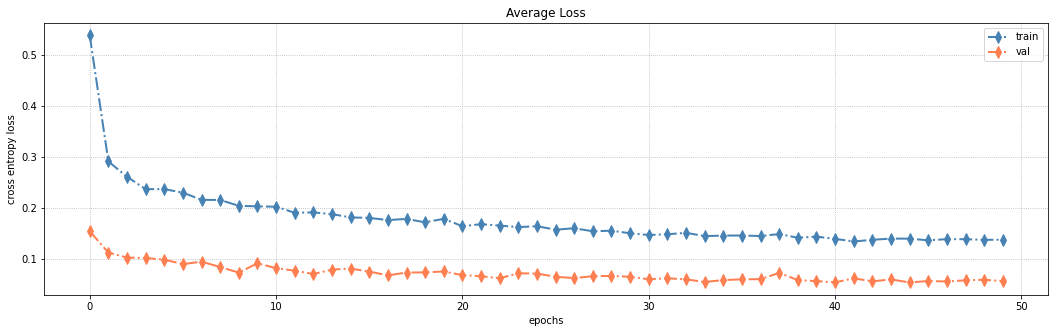

In [119]:
# plotting accuracy
fig, ax = plt.subplots(figsize=(18,5))
epochs = range(nepochs25)
ax.set_title('Average Loss')
ax.set_xlabel('epochs')
ax.set_ylabel('cross entropy loss')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_loss25, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_loss25, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

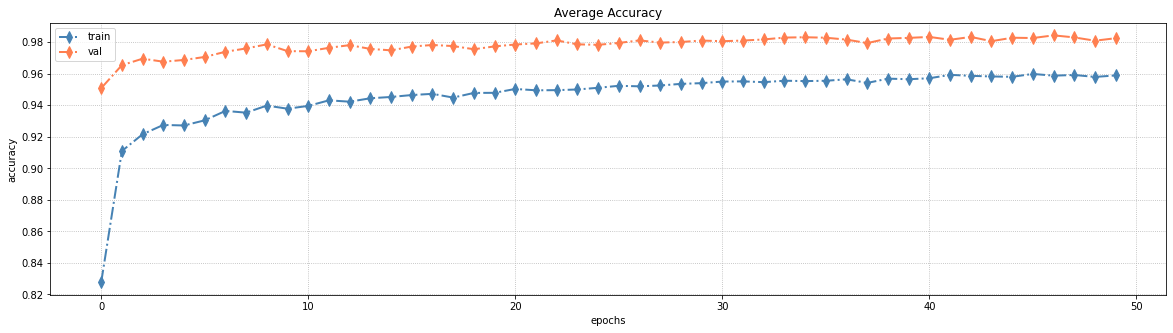

In [120]:
# plotting loss
fig, ax = plt.subplots(figsize=(20,5))
epochs = range(nepochs25)
ax.set_title('Average Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_acc25, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_acc25, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

#### Discussion
---
A dropout rate of 25% has reduced the overall accuracy of the network and in particular the accuracy of the network on the training set.  With as low a rate as 25% is, my impression is that the baseline model for the network is just complex enough to classify the dataset well and a reduction in the number of connections within the network is simply hurting the accuracy of the network.  Here it is not extreme, but I expect that that will change as the droprate increases.

#### Confusion Matrix

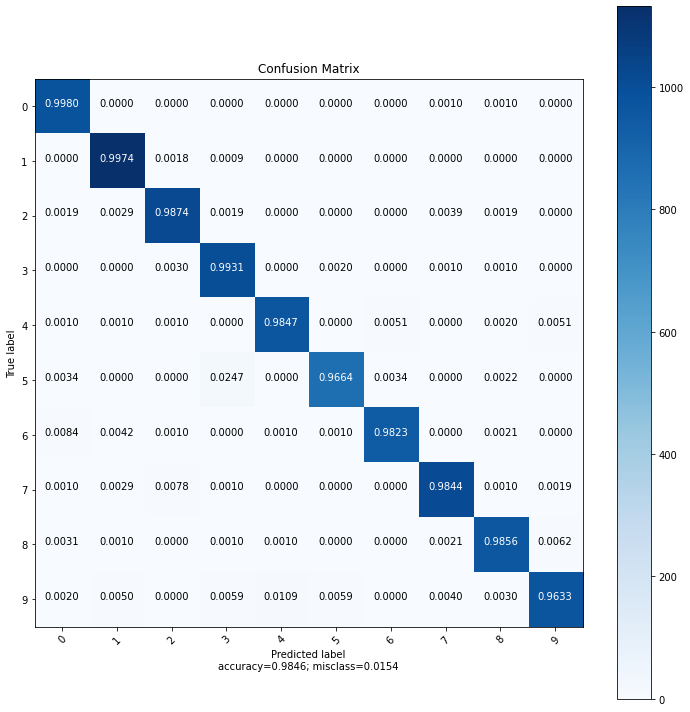

In [121]:
"""
inspiration for the code used below comes from these sources:

https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
"""

cf = metrics.confusion_matrix(y_test25, pred25)
plot_confusion_matrix(cf, range(10), title='Confusion Matrix')

### 50% Dropout

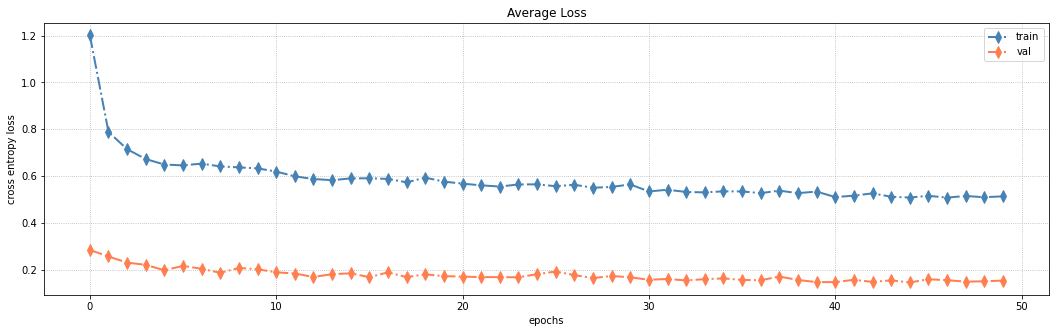

In [122]:
# plotting accuracy
fig, ax = plt.subplots(figsize=(18,5))
epochs = range(nepochs50)
ax.set_title('Average Loss')
ax.set_xlabel('epochs')
ax.set_ylabel('cross entropy loss')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_loss50, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_loss50, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

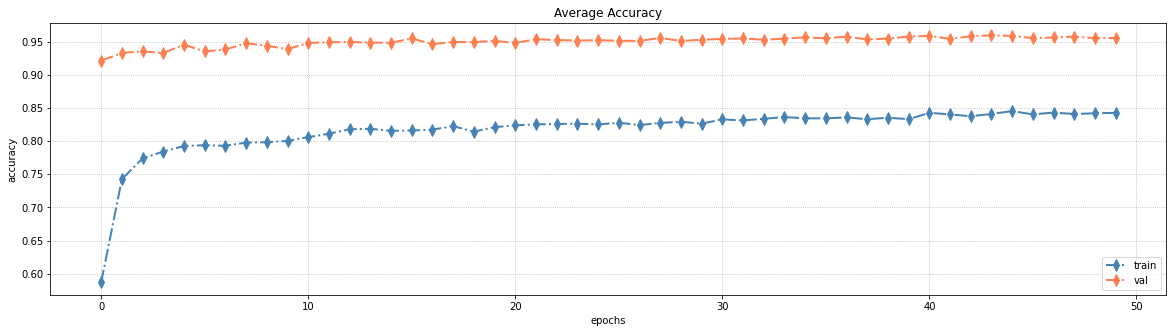

In [123]:
# plotting loss
fig, ax = plt.subplots(figsize=(20,5))
epochs = range(nepochs50)
ax.set_title('Average Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_acc50, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_acc50, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

Discussion
---
Here the accuracy of the network really begins to decay.  A loss of 50% of the connections in the network has really damaged the accuracy of the training set, although it has not hurt the accuracy of the network on the validation as much as I would expect. With a peak accuracy of 85% on the training set, I expected worse performance on the validation set.  That said, the accuracy of the network on the validation set is still substantially lower than it was in the base model. There is a difference there of roughly 3%.

#### Confusion Matrix

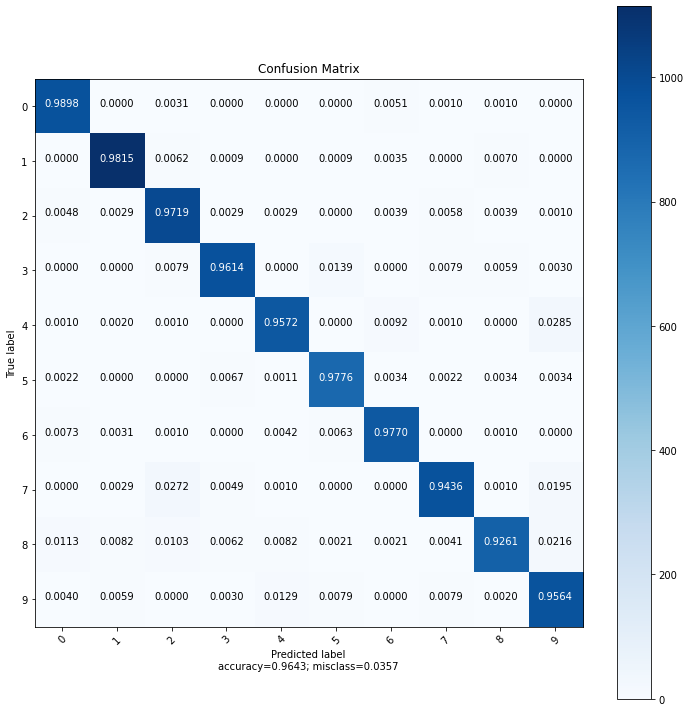

In [124]:
cf = metrics.confusion_matrix(y_test50, pred50)
plot_confusion_matrix(cf, range(10), title='Confusion Matrix')

### 75% Dropout

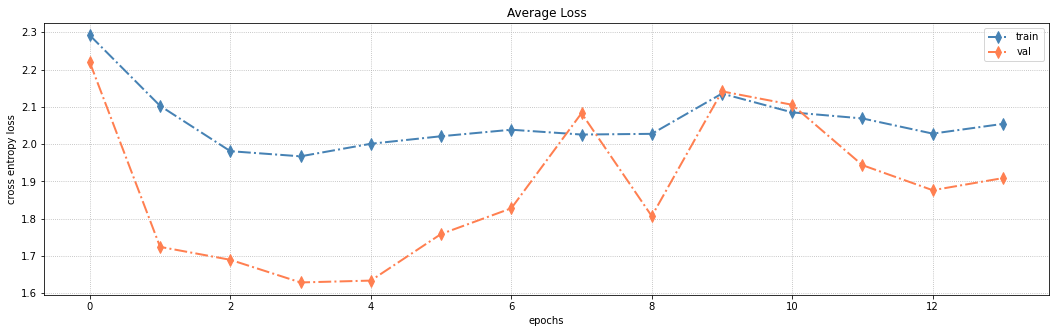

In [125]:
# plotting accuracy
fig, ax = plt.subplots(figsize=(18,5))
epochs = range(nepochs75)
ax.set_title('Average Loss')
ax.set_xlabel('epochs')
ax.set_ylabel('cross entropy loss')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_loss75, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_loss75, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

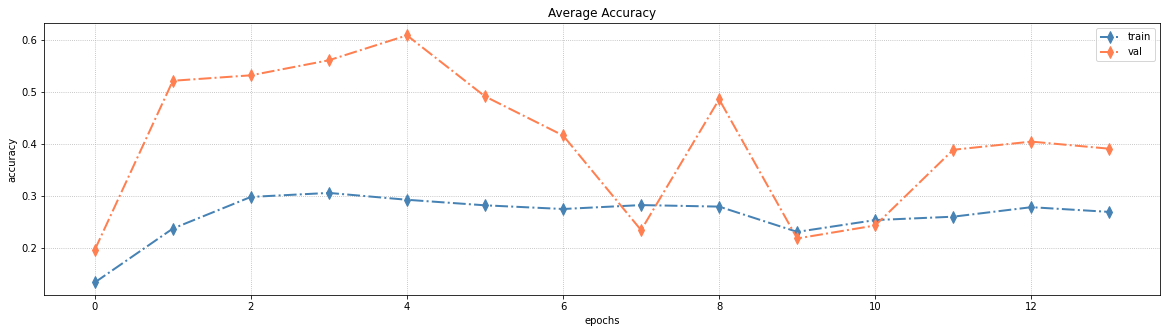

In [126]:
# plotting loss
fig, ax = plt.subplots(figsize=(20,5))
epochs = range(nepochs75)
ax.set_title('Average Accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.xaxis.grid(True,ls='dotted')
ax.yaxis.grid(True,ls='dotted')
ax.plot(epochs, tr_acc75, label='train', color='steelblue', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.plot(epochs, val_acc75, label='val', color='coral', marker='d', markersize=8, linestyle='dashdot', linewidth=2)
ax.legend()

plt.show()

Discussion
---
75% dropout went about as well as you might expect.  Forcing the network to forgoe 75% of its connections during training ended up having a *very large* negative effect on the performance of the network.  It would seem that more than 25% of the connections within the network are crucial to its performance. While 25% and 50% dropout did not hurt the network *too* bad, 75% seems to have all but destroyed it.  The original accuracy of the network on the validation set was 98% and the network with a 75% dropout rate has a peak accuracy of only 60%.

#### Confusion Matrix

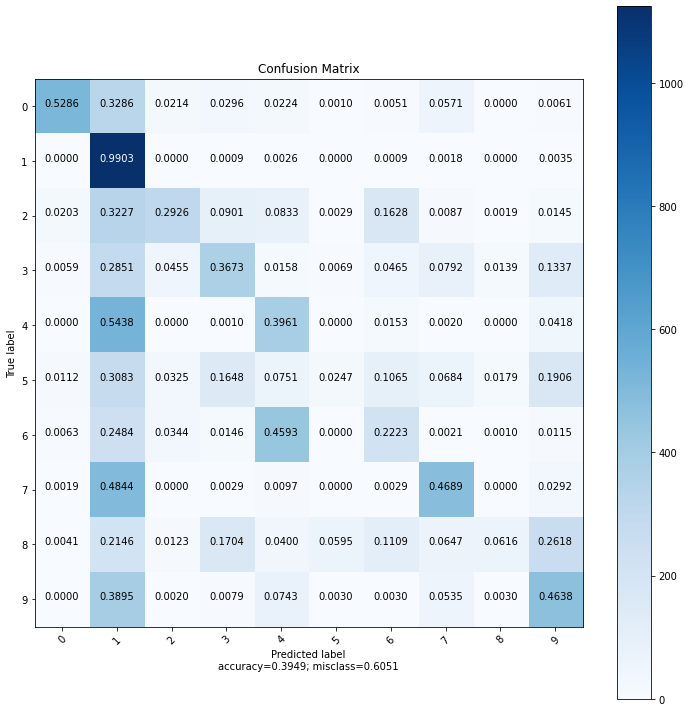

In [127]:
cf = metrics.confusion_matrix(y_test75, pred75)
plot_confusion_matrix(cf, range(10), title='Confusion Matrix')